# Diabetes Outcome Predictions from Related Health Measurements
## Class: Introduction to Data Science 1/2022
### Lecturer: Lect. Dr. Petchara Pattarakijwanich
#### <div style="text-align: right"> Phurinat Udomsopagit 6536646 </div> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing
## Import dataset downloaded from Kaggle
- National Institute of Diabetes and Digestive and Kidney Diseases
- Female, >= 21 years old
- Race: Pima Indian

In [2]:
df = pd.read_csv('/work/diabetes.csv')
X = df.drop('Outcome', axis=1).copy()
y = df['Outcome'].copy()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
DeepnoteChart(df, """{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{"x":{"bin":true,"sort":null,"type":"quantitative","field":"Outcome","scale":{"type":"linear"}},"y":{"sort":null,"type":"quantitative","scale":{"type":"linear"},"aggregate":"count"}}}""")

## Visualize feature correlation of the dataset

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'Pregnancies'),
  Text(1.5, 0, 'Glucose'),
  Text(2.5, 0, 'BloodPressure'),
  Text(3.5, 0, 'SkinThickness'),
  Text(4.5, 0, 'Insulin'),
  Text(5.5, 0, 'BMI'),
  Text(6.5, 0, 'DiabetesPedigreeFunction'),
  Text(7.5, 0, 'Age'),
  Text(8.5, 0, 'Outcome')])

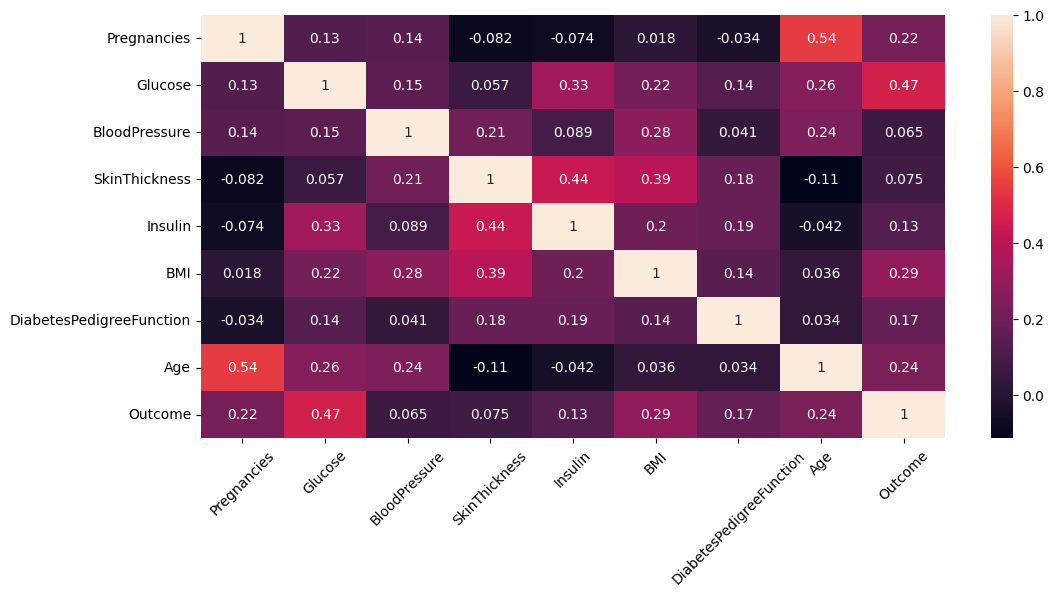

In [4]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(12,5.5))         # Sample figsize in inches
sns.heatmap(df_corr, annot=True, ax=ax)
plt.xticks(rotation=45)

In [5]:
from scipy.optimize import minimize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Split dataset into train and test sets
- Stratify is to randomly balance outcome of the patients
- Test split size = 20%

In [6]:
train, test = train_test_split(df, stratify=df['Outcome'], test_size=0.2, random_state = 646)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
743,9,140,94,0,0,32.7,0.734,45,1
395,2,127,58,24,275,27.7,1.600,25,0
94,2,142,82,18,64,24.7,0.761,21,0
591,2,112,78,50,140,39.4,0.175,24,0
130,4,173,70,14,168,29.7,0.361,33,1
...,...,...,...,...,...,...,...,...,...
720,4,83,86,19,0,29.3,0.317,34,0
234,3,74,68,28,45,29.7,0.293,23,0
434,1,90,68,8,0,24.5,1.138,36,0
451,2,134,70,0,0,28.9,0.542,23,1


In [7]:
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
307,0,137,68,14,148,24.8,0.143,21,0
240,1,91,64,24,0,29.2,0.192,21,0
693,7,129,68,49,125,38.5,0.439,43,1
389,3,100,68,23,81,31.6,0.949,28,0
331,2,87,58,16,52,32.7,0.166,25,0
...,...,...,...,...,...,...,...,...,...
380,1,107,72,30,82,30.8,0.821,24,0
88,15,136,70,32,110,37.1,0.153,43,1
47,2,71,70,27,0,28.0,0.586,22,0
554,1,84,64,23,115,36.9,0.471,28,0


## Assign input features and output to X and y

In [8]:
X_train = train.drop('Outcome', axis=1).copy(); y_train = train['Outcome']
X_test = test.drop('Outcome', axis=1).copy(); y_test = test['Outcome']

## Normalize the input value of feature
- Using StandardScaler

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Building Model, Implementation and Evaluation

## Random forest and decision tree

### Define function to train random forest and decision tree model
- Random forest
    - number of trees: 200
    - max depth:10
- In addition, feature_importance function to determine features score

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def DT_train_score(x_train, x_test, y_train, y_test):
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return model, accuracy

def RF_train_score(x_train, x_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=200, max_depth=10)
    model.fit(x_train, y_train)
    accuracy = model.score(x_test, y_test)
    return model, accuracy

def feature_importance(model):
    feature_score = model.feature_importances_
    return feature_score

### Train the model

In [11]:
RF1, accurayRF_1 = RF_train_score(X_train, X_test, y_train, y_test)
RF1_feature_score = pd.Series(feature_importance(RF1))
RF1_score_sorted = RF1_feature_score.argsort()[::-1]
print('RF Accuracy \tall  \t{:.2f}'.format(accurayRF_1),end='\n')
print(RF1_score_sorted)

DT1, accurayDT_1 = DT_train_score(X_train, X_test, y_train, y_test)
DT1_feature_score = pd.Series(feature_importance(DT1))
DT1_score_sorted = DT1_feature_score.argsort()[::-1]
print('DT Accuracy \tall  \t{:.2f}'.format(accurayDT_1),end='\n')
print(DT1_score_sorted)

RF Accuracy 	all  	0.82
7    1
6    5
5    6
4    7
3    2
2    0
1    4
0    3
dtype: int64
DT Accuracy 	all  	0.71
7    1
6    5
5    6
4    7
3    0
2    2
1    4
0    3
dtype: int64


### Effect of number of feature on accuracy score of the models

In [12]:
%%time
x_RF = {}
current_RF = []
x_plotRF = np.array([])
y_plotRF = np.array([])
sum_scoreRF = 0

x_name = np.array([])
#RF model
for i,idx in enumerate(RF1_score_sorted):
    current_RF += [idx]
    x_RF[i] = X.iloc[:, current_RF].astype(str)
    xD1_train, xD1_test, yD1_train, yD1_test = train_test_split(x_RF[i], y, test_size=0.3, random_state=1)
#     xD1_train, xD1_test = normalize(xD1_train, xD1_test)
    #Train model
    RFmod_2, accurayRF_2 = RF_train_score(xD1_train, xD1_test, yD1_train, yD1_test)
    sum_scoreRF = sum_scoreRF + RF1_feature_score[idx]
    x_plotRF = np.append(x_plotRF, sum_scoreRF)
    y_plotRF = np.append(y_plotRF, accurayRF_2)
    x_name = np.append(x_name, X.columns[idx])
    print('RF Accuracy \t+{} \t{:.2f} \t{:.2f} {}'.format(idx, RF1_feature_score[idx], accurayRF_2, X.columns[idx]) ,end='\n')
    print('Count {}' .format(i))

RF Accuracy 	+1 	0.25 	0.71 Glucose
Count 0
RF Accuracy 	+5 	0.17 	0.75 BMI
Count 1
RF Accuracy 	+6 	0.13 	0.76 DiabetesPedigreeFunction
Count 2
RF Accuracy 	+7 	0.13 	0.77 Age
Count 3
RF Accuracy 	+2 	0.10 	0.79 BloodPressure
Count 4
RF Accuracy 	+0 	0.08 	0.79 Pregnancies
Count 5
RF Accuracy 	+4 	0.07 	0.80 Insulin
Count 6
RF Accuracy 	+3 	0.07 	0.81 SkinThickness
Count 7
CPU times: user 3.44 s, sys: 0 ns, total: 3.44 s
Wall time: 4.08 s


In [13]:
%%time
x_DT = {}
current_DT = []
x_plotDT = np.array([])
y_plotDT = np.array([])
sum_scoreDT = 0
#DT model
for i,idx in enumerate(DT1_score_sorted):
    current_DT += [idx]
    x_DT[i] = X.iloc[:, current_DT].astype(str)
    xD1_train, xD1_test, yD1_train, yD1_test = train_test_split(x_DT[i], y, test_size=0.3, random_state=1)
#     xD1_train, xD1_test = normalize(xD1_train, xD1_test)
    #Train model
    DTmod_2, accurayDT_2 = DT_train_score(xD1_train, xD1_test, yD1_train, yD1_test)
    sum_scoreDT = sum_scoreDT + DT1_feature_score[idx]
    x_plotDT = np.append(x_plotDT, sum_scoreDT)
    y_plotDT = np.append(y_plotDT, accurayDT_2)
    print('DT Accuracy \t+{} \t{:.2f} \t{:.2f} {}'.format(idx, DT1_feature_score[idx], accurayDT_2, X.columns[idx]) ,end='\n')
    print('Count {}' .format(i))

DT Accuracy 	+1 	0.30 	0.70 Glucose
Count 0
DT Accuracy 	+5 	0.18 	0.69 BMI
Count 1
DT Accuracy 	+6 	0.16 	0.65 DiabetesPedigreeFunction
Count 2
DT Accuracy 	+7 	0.10 	0.70 Age
Count 3
DT Accuracy 	+0 	0.09 	0.73 Pregnancies
Count 4
DT Accuracy 	+2 	0.09 	0.70 BloodPressure
Count 5
DT Accuracy 	+4 	0.04 	0.68 Insulin
Count 6
DT Accuracy 	+3 	0.04 	0.68 SkinThickness
Count 7
CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 135 ms


### Visualize the feature score against the model accuracy

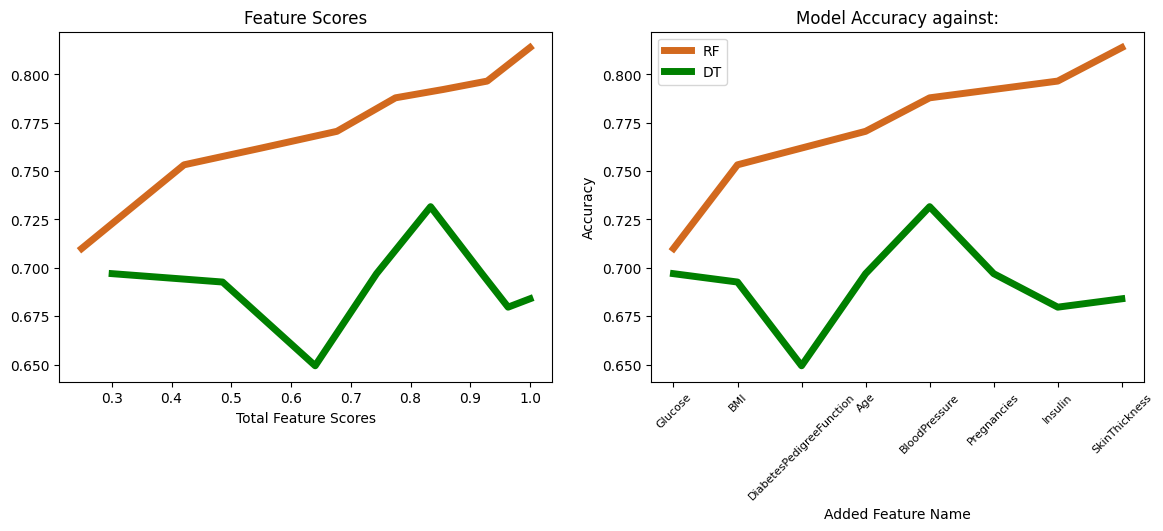

In [14]:
fig_DTRF = plt.figure(figsize=(14,10))
ax_DTRF1 = fig_DTRF.add_subplot(221)
ax_DTRF1.plot(x_plotRF,y_plotRF ,linewidth = 5.0 ,color='chocolate', label='RF')
ax_DTRF1.plot(x_plotDT,y_plotDT ,linewidth = 5.0 ,color='green', label='DT')
ax_DTRF1.set_title('Feature Scores', fontdict=None, loc='center', )
ax_DTRF1.set_xlabel('Total Feature Scores')
ax_DTRF2 = fig_DTRF.add_subplot(222)
ax_DTRF2.plot(x_name, y_plotRF, linewidth = 5.0, color='chocolate', label='RF')
ax_DTRF2.plot(x_name, y_plotDT ,linewidth = 5.0, color='green', label='DT')
ax_DTRF2.set_title('Feature Names Sorted by Importance Scores', fontdict=None, loc='center', )
ax_DTRF2.set_xlabel('Added Feature Name')
plt.title('Model Accuracy against:')
plt.ylabel('Accuracy')
plt.xticks(fontsize=8, rotation=45)
plt.legend()
# plt.savefig(dpi=600,fname='Feature_vs_Accuracy_all.png',bbox_inches='tight')
plt.show()

### Implement model to test dataset to evaluate the model

In [15]:
yp_RF = RF1.predict(X_test)
yp_DT = DT1.predict(X_test)
yp_DT

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [16]:
yp_RF

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

### Function to visualize confusion matrix

In [17]:
def plot_confusion_matrix(y_test,y_scores, classNames):
    # y_test=np.argmax(y_test, axis=1)
    # y_scores=np.argmax(y_scores, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y]/np.sum(cm[x,:])

    plt.figure(figsize=(8,7))
    sns.set(font_scale=1) # for label size
    df = sns.heatmap(con, annot=True,fmt='.2', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    df.figure.savefig("image2.png")

classNames = ['No diabetes', 'Diabetes'] 

### Calculate score, confusion matrix and visualize confusion matrix

Random forest confusion matrix is 
 [[90 10]
 [17 37]]
Random forest summary evaluation is 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       100
           1       0.79      0.69      0.73        54

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154

**** Confusion Matrix ****
[[90 10]
 [17 37]]
**** Classification Report ****
              precision    recall  f1-score   support

 No diabetes       0.84      0.90      0.87       100
    Diabetes       0.79      0.69      0.73        54

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



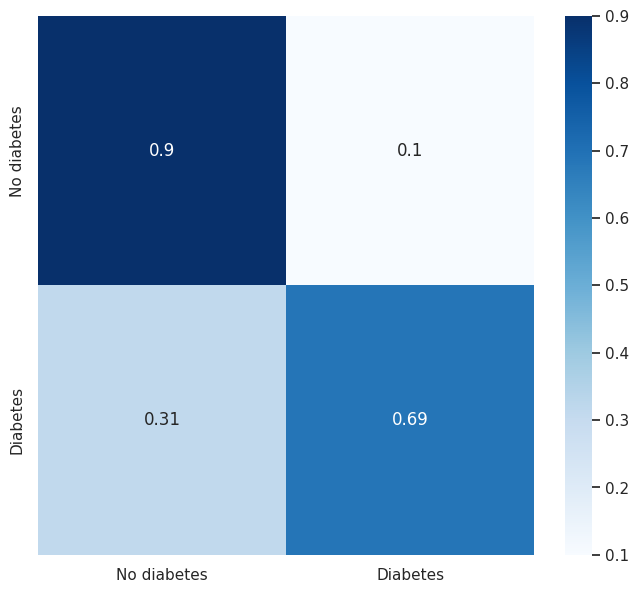

In [18]:
print(f'Random forest confusion matrix is \n {confusion_matrix(y_true= y_test, y_pred=yp_RF)}')
print(f'Random forest summary evaluation is \n {classification_report(y_true = y_test, y_pred=yp_RF)}')
plot_confusion_matrix(y_test, yp_RF, classNames)

Decision tree confusion matrix is 
 [[74 26]
 [19 35]]
Decision tree summary evaluation is 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154

**** Confusion Matrix ****
[[74 26]
 [19 35]]
**** Classification Report ****
              precision    recall  f1-score   support

 No diabetes       0.80      0.74      0.77       100
    Diabetes       0.57      0.65      0.61        54

    accuracy                           0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



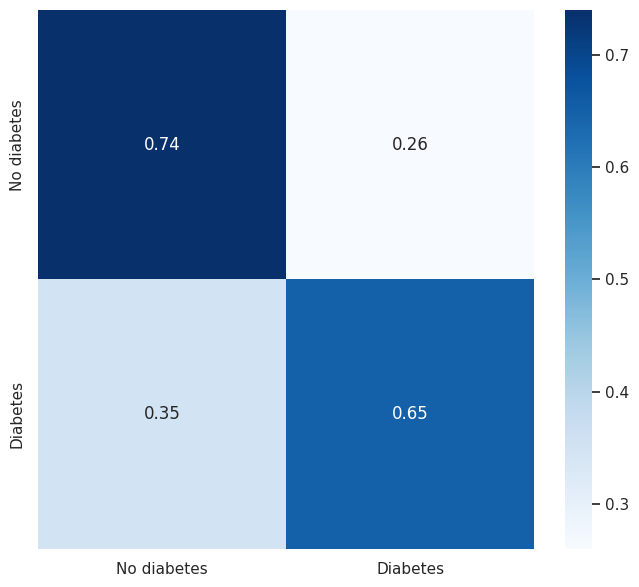

In [19]:
print(f'Decision tree confusion matrix is \n {confusion_matrix(y_true= y_test, y_pred=yp_DT)}')
print(f'Decision tree summary evaluation is \n {classification_report(y_true = y_test, y_pred=yp_DT)}')
plot_confusion_matrix(y_test, yp_DT, classNames)

## Multi Layer Perceptron (MLP), Neural Network

### Import necessary library

In [20]:
import tensorflow as tf
from keras import Sequential
from keras import optimizers, models, Input
from keras.layers import Dense

2022-12-22 04:23:58.069776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 04:23:58.272235: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-22 04:23:58.272272: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-22 04:23:58.336091: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-22 04:24:00.208152: W tensorflow/stream_executor/pla

### Define layer of the MLP model

In [21]:
sgd = optimizers.SGD(learning_rate=0.01)
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='softmax')) 
model.add(Dense(1)) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
2022-12-22 04:24:02.830257: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-22 04:24:02.830312: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-22 04:24:02.830348: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not a

### Define model compiler and loss function and fit the model to traning dataset

#### Hyperparameters tuning
- batch size: 5
- validation split: 15%
- number of epoch: 100

In [ ]:
%%time
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=5, validation_split=0.15, epochs=100)

Epoch 1/100
105/105 [==============================] - 1s 5ms/step - loss: 0.2820 - accuracy: 0.6545 - val_loss: 0.2356 - val_accuracy: 0.6344
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.6545 - val_loss: 0.2279 - val_accuracy: 0.6344
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.6545 - val_loss: 0.2242 - val_accuracy: 0.6344
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.2170 - accuracy: 0.6545 - val_loss: 0.2204 - val_accuracy: 0.6344
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 0.2139 - accuracy: 0.6545 - val_loss: 0.2170 - val_accuracy: 0.6344
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.6564 - val_loss: 0.2143 - val_accuracy: 0.6344
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.2087 - accuracy: 0.6603 - val_loss: 0.2121 - val_accuracy: 0.6344

In [ ]:
model.save('best_mlp')

INFO:tensorflow:Assets written to: best_mlp/assets


### Visualize the model loss value accuracy score on iteration numbers

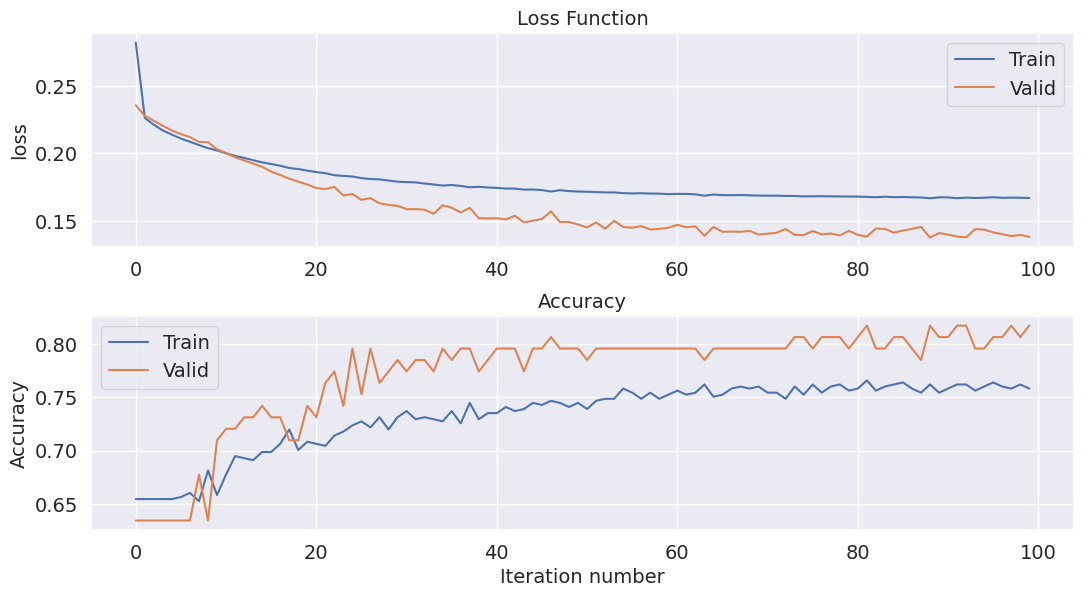

In [ ]:
figMLP, axesMLP = plt.subplots(2, 1, figsize=(11, 6.5))
axesMLP[0].plot(history.epoch,history.history['loss'], label='Train')
axesMLP[0].plot(history.epoch,history.history['val_loss'], label='Valid')
axesMLP[0].set_ylabel('loss', fontsize=14)
axesMLP[0].set_title('Loss Function', fontsize=14)
axesMLP[0].xaxis.set_tick_params(labelsize=14)
axesMLP[0].yaxis.set_tick_params(labelsize=14)
axesMLP[0].legend(fontsize=14)
axesMLP[1].plot(history.epoch,history.history['accuracy'], label='Train')
axesMLP[1].plot(history.epoch,history.history['val_accuracy'], label='Valid')
#axesMLP[1].scatter(x=129, y=0.8097,'r*', label='0.8097')
axesMLP[1].set_ylabel('Accuracy', fontsize=14)
axesMLP[1].set_xlabel('Iteration number', fontsize=14)
axesMLP[1].set_title('Accuracy', fontsize=14)
axesMLP[1].xaxis.set_tick_params(labelsize=14)
axesMLP[1].yaxis.set_tick_params(labelsize=14)
axesMLP[1].legend(fontsize=14)
# figMLP.suptitle('MLP with SGD')
figMLP.tight_layout()
figMLP.subplots_adjust(top=0.88)
figMLP.show()

### Implement the model for evaluation

In [26]:
yp_mlp = model.predict(X_test).ravel()
yp_mlp
yp_mlp_class = (yp_mlp > 0.5).astype(int)
# # yp_mlp_class = [i for i in yp_mlp.astype("int32") if i > 0.5] (yp_mlp > 0.5).astype("int32")
yp_mlp_class

5/5 [==============================] - 0s 1ms/step


array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Visualize the confusion matrix of MLP model

**** Confusion Matrix ****
[[94  6]
 [18 36]]
**** Classification Report ****
              precision    recall  f1-score   support

 No diabetes       0.84      0.94      0.89       100
    Diabetes       0.86      0.67      0.75        54

    accuracy                           0.84       154
   macro avg       0.85      0.80      0.82       154
weighted avg       0.85      0.84      0.84       154



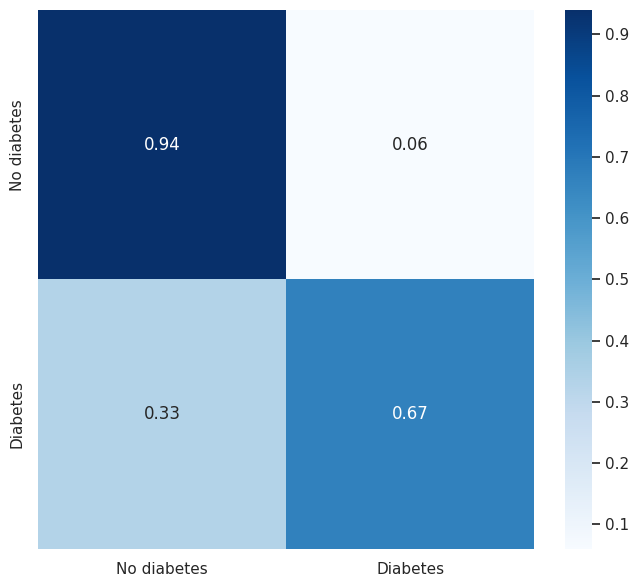

In [27]:
plot_confusion_matrix(y_test.to_numpy(),yp_mlp_class, classNames) 

## Evaluation of all models

### ROC curve plots of each model with area under curve

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import roc_curve, auc

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


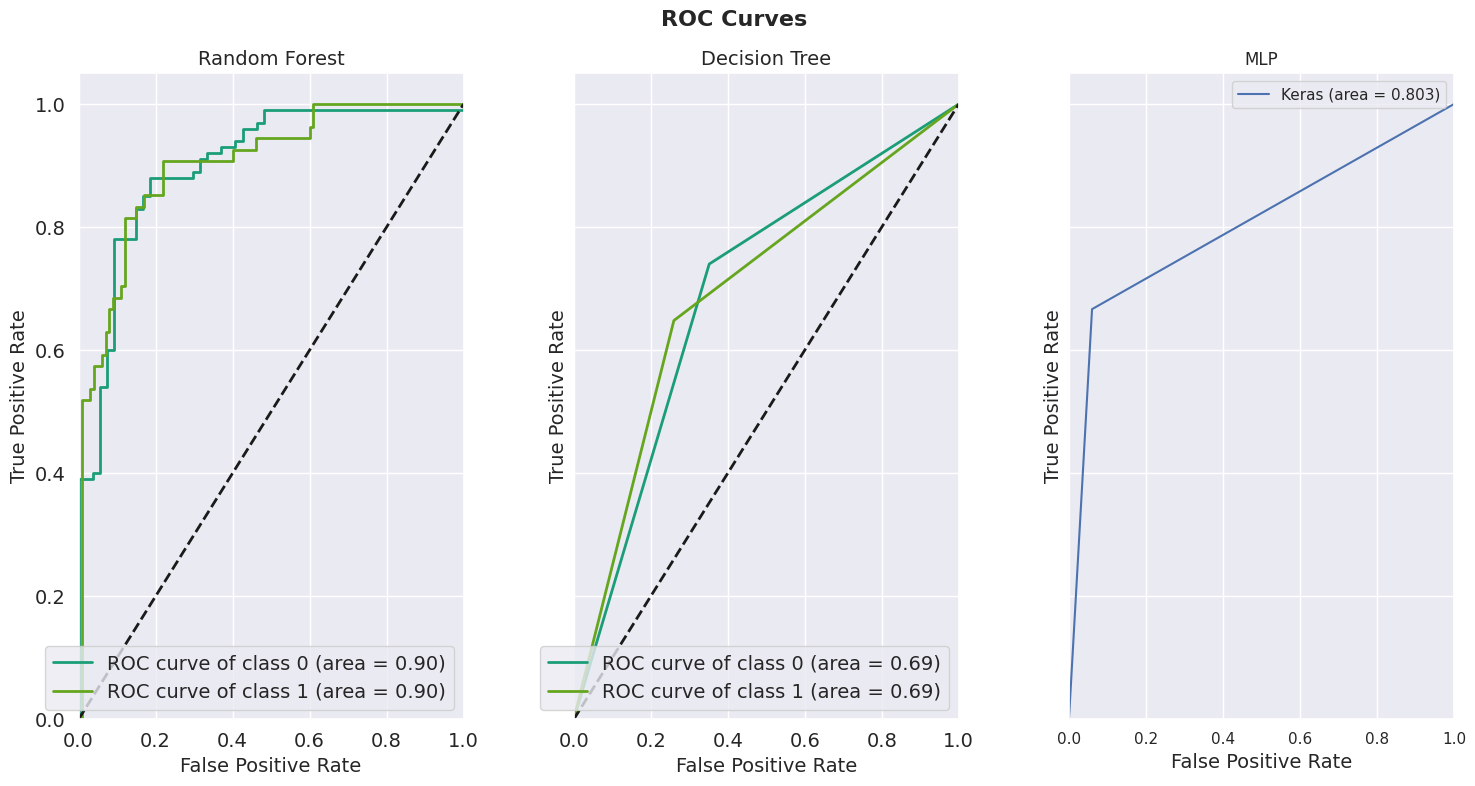

In [40]:
fpr, tpr, thresholds_keras = roc_curve(y_test, yp_mlp_class)
auroc_mlp = auc(fpr, tpr)
fig_auc,ax_auc = plt.subplots(1,3, sharex=True, sharey=True, figsize=(15,8), facecolor='white')
fig_auc.suptitle('ROC Curves', fontsize=16, fontweight='bold')
skplt.metrics.plot_roc(y_test, RF1.predict_proba(X_test), title='Random Forest', ax=ax_auc[0], cmap="Dark2", plot_micro=False, plot_macro=False, title_fontsize=14, text_fontsize=14)
skplt.metrics.plot_roc(y_test, DT1.predict_proba(X_test), title='Decision Tree', ax=ax_auc[1], cmap="Dark2", plot_micro=False, plot_macro=False, title_fontsize=14, text_fontsize=14)
ax_auc[2].plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auroc_mlp))
ax_auc[2].set_title('MLP')
ax_auc[2].set_ylabel('True Positive Rate', fontsize=14)
ax_auc[2].set_xlabel('False Positive Rate', fontsize=14)
plt.legend()
fig_auc.tight_layout()


### Precision-Recall curve plots of each model with area under curve

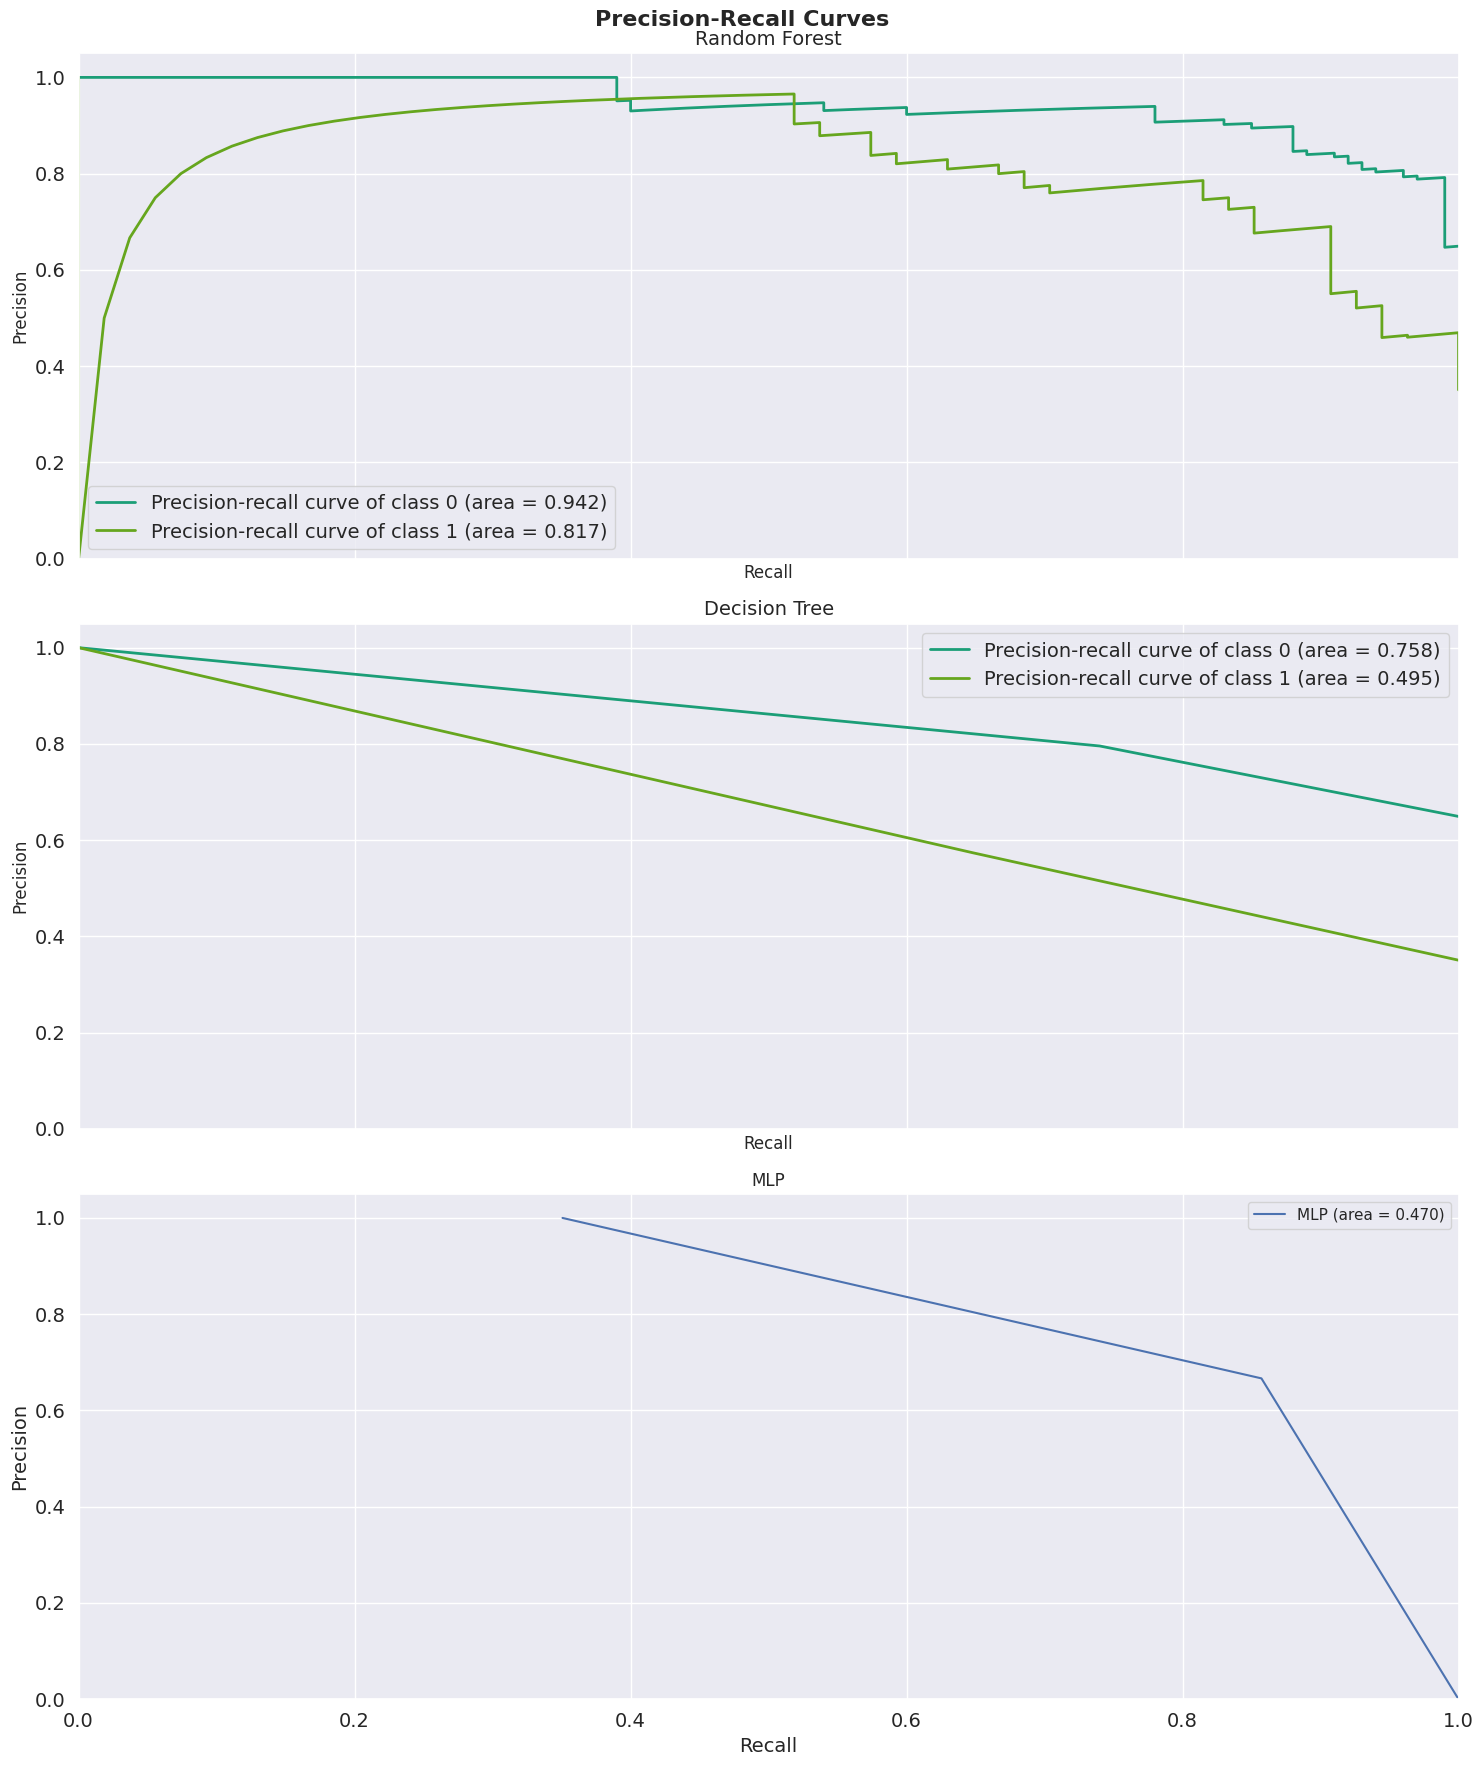

In [42]:
from sklearn.metrics import precision_recall_curve
fpr_prc, tpr_prc, thresholds_keras = precision_recall_curve(y_test, yp_mlp_class)
auprc_mlp = auc(fpr_prc, tpr_prc)
fig_prc,ax_prc = plt.subplots(3,1, sharex=True, sharey=True, figsize=(15,18), facecolor='white')
fig_prc.suptitle('Precision-Recall Curves', fontsize=16, fontweight='bold')
skplt.metrics.plot_precision_recall(y_test, RF1.predict_proba(X_test), title='Random Forest', ax=ax_prc[0], cmap="Dark2", plot_micro=False, title_fontsize=14, text_fontsize=14)
skplt.metrics.plot_precision_recall(y_test, DT1.predict_proba(X_test), title='Decision Tree', ax=ax_prc[1], cmap="Dark2", plot_micro=False, title_fontsize=14, text_fontsize=14)
ax_prc[2].plot(fpr_prc, tpr_prc, label='MLP (area = {:.3f})'.format(auprc_mlp))
ax_prc[2].set_title('MLP')
ax_prc[2].set_ylabel('Precision', fontsize=14)
ax_prc[2].set_xlabel('Recall', fontsize=14)
plt.legend(loc='best')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig_prc.tight_layout()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=592150bd-22cf-4c14-9fa5-3557317a3e2f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>